# POL280 Bayesian Modeling Homework 4

### Gento Kato (June 15, 2017)

---

*The 2016 American National Election Study (ANES) data and codebook are stored in the Dropbox folder (<code>ANES2016.dta</code>). The variable presvote is coded so that 0 = Clinton and 1 = Trump, and other variables are coded so that higher values correspond to more conservative attitudes.*

---

### 1. Perform Bayesian model averaging on a regression model of your choice. Present the results (preferably in graphical format).

**Load Packages and Data**

In [165]:
## Load Packages
library(rjags); library(mcmcplots); library(coefplot); library(ggplot2)
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/gktheme.R")
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/imageplot.bma2")
library(MCMCpack); library(BMA);library(mlogitBMA); library(mlogit)

In [ ]:
## Load Data
library(foreign)
anes16 = read.dta("../data/POL280/ANES2016.dta")

**Describe Dependent Variable**

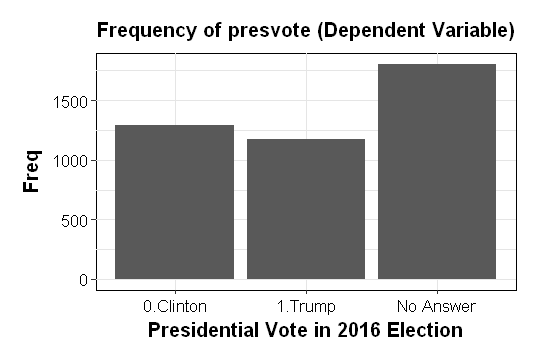

In [125]:
anes16$presvote[is.na(anes16$presvote)] <- 3 
anes16$presvote[anes16$presvote==1] <- 2
anes16$presvote[anes16$presvote==0] <- 1
options(repr.plot.width=4.5, repr.plot.height=3, warn=-1)
dvtab <- as.data.frame(table(as.character(anes16$presvote))) 
dvtab$Var1 <- as.character(dvtab$Var1)
dvtab$Var1[1] <- "0.Clinton"; dvtab$Var1[2] <- "1.Trump"; dvtab$Var1[3] <- "No Answer"
ggplot(data=dvtab, aes(Var1, Freq)) + gktheme + geom_bar(stat = "identity") +
ggtitle("Frequency of presvote (Dependent Variable)") + xlab("Presidential Vote in 2016 Election")

**Bayesian Model Averaging on Multinomial-Logit Model** 

In [126]:
formula.mlogit <- formula(presvote ~ genderresent1 + genderresent2 + genderresent3 + genderresent4 + 
                          female + partyid + libcon + spendserv + defensespend + healthinsurance + guarjobs + 
                          mexicowall + aidblacks + environmentjobs + affirmativeaction + troopsisis + syrianrefugees + 
                          climatechangeaction + transgenderbathrooms + abortion + thermometerpopefrancis + 
                          thermometerevangelicals + thermometerblacklivesmatter)

In [152]:
mlogitBMAres <- bic.mlogit(formula.mlogit, data=na.omit(anes16), choices = 1:3, 
                           base.choice = 1, include.intercepts = TRUE, verbose=TRUE, OR=1000)


Begg & Gray approximation started.
 24 variables considered.
 1109 models initially selected.
Final number of models: 47 


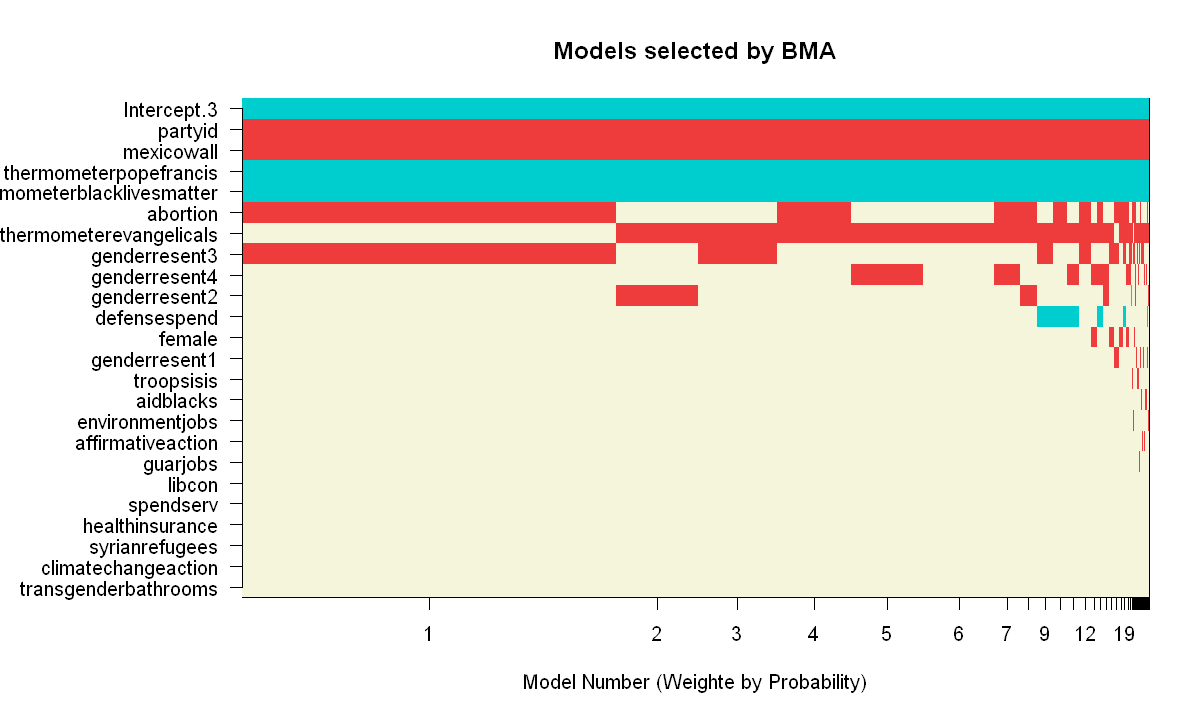

In [170]:
imageplot.mlogit <- 
function (x, ...) 
    imageplot.bma2(x$bic.glm, ...)

options(repr.plot.width=10, repr.plot.height=6, warn=-1)
imageplot.mlogit(mlogitBMAres, color=c("brown2","cyan3","beige"), order= "probne0")

In [143]:
#summary(mlogitBMAres)
#estimate.mlogit(mlogitBMAres, anes16)

In [144]:
#options(repr.plot.width=6, repr.plot.height=6, warn=-1)
#plot(mlogitBMAres)

### 2. Which variables most and least consistently contribute predictive value in explaining your response variable?

### **Summarize Result**